<a href="https://colab.research.google.com/github/ankitydv-py/GRIP_Tasks/blob/main/GRIP_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task1: Prediction using Supervised ML

Predict the percentage of an student based on the no. of study hours.
* This is a simple linear regression task as it involves just 2 variables.
* You can use R, Python, SAS Enterprise Miner or any other tool
* Data can be found at http://bit.ly/w-data
* What will be predicted score if a student studies for 9.25 hrs/ day?
* Sample Solution :https://bit.ly/2HxiGGJ
* Task submission:
  1.Host the code on GitHub Repository (public). Record the code and output in  a video. Post the video on YouTube.
  2. Share links of code (GitHub) and video (YouTube) as a post on YOUR LinkedIn profile, not TSF Network.
  3. Submit the LinkedIn link in Task Submission Form when shared

In [ ]:
#importing useful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# importing dataset file

df = pd.read_csv("/content/drive/MyDrive/CodesWork/GRIP_Internship/DS_Task/#1/Data_Set.txt")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Visualztion of data (releation ship)

In [ ]:
# sorting the array in increasing order of no of hours

sorted_df = df.sort_values(by='Hours')

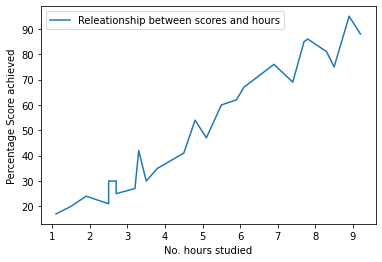

In [ ]:
sorted_df.plot(x='Hours', y='Scores', xlabel='No. hours studied', ylabel='Percentage Score achieved', label='Releationship between scores and hours', style='-')

##Training of the model (Linear Regression)

In [ ]:
# defining X and Y of the values

X=df.iloc[:, :-1].values
y=df.iloc[:, 1].values

In [ ]:
# Spiliting the variables (Training part and testing part)

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0) 

In [ ]:
# Importing Linear Regression libraries

from sklearn.linear_model import LinearRegression  
model = LinearRegression()

In [ ]:
# Trained the model (Fitting the model)

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Making predictions of our test part

pred = model.predict(X_test)

In [ ]:
# Comparsion of actual and predicted score

comp_df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
comp_df

,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267


In [ ]:
# No of hours for which we have to calculate Percentage score

input = 9.25

In [ ]:
prediction = model.predict([[input]])
prediction

array([93.67656425])

In [ ]:
print("No of Hours = {}".format(input))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = 9.25
Predicted Score = 93.67656425238496


# Task 2 : Prediction using Unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters 
and represent itvisually.
* Use R or Python or perform this task
* Dataset :https://bit.ly/3kXTdox
* Sample Solution :https://bit.ly/3cGyP8j
* Task submission:
  1.Host the code on GitHub Repository (public). Record the code and 
  output in a video. Post the video on YouTube
  2.Share links of code (GitHub) and video (YouTube) as a post on 
  YOUR LinkedInprofile
  3. Submit the LinkedIn link in Task Submission Form when shared.
  4.Please read FAQs on how to submit the tasks.

In [2]:
#importing useful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [3]:
# importing dataset file

df = pd.read_csv("/content/drive/MyDrive/CodesWork/GRIP_Internship/DS_Task/#2/Iris.csv")
df.set_index("Id")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

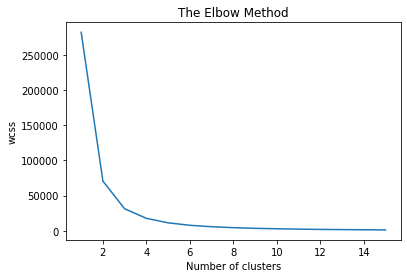

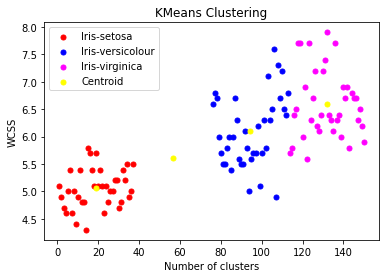

In [6]:
X = df.iloc[:, [0, 1, 2, 3]].values

#Find the number of clusters
wcss = []

for i in range (1,16): #15 cluster
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=0) 
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,16),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

#KMeans clustering
kmeans= KMeans(n_clusters=4,init='k-means++', random_state=0)
y=kmeans.fit_predict(X)

plt.scatter(X[y == 0,0], X[y==0,1], s=25, c='red', label='Iris-setosa')
plt.scatter(X[y == 1,0], X[y==1,1], s=25, c='blue', label='Iris-versicolour')
plt.scatter(X[y == 2,0], X[y==2,1], s=25, c='magenta', label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=25, c='yellow', label='Centroid')
plt.title('KMeans Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of square
plt.legend()
plt.show()

In [ ]:
# # k means
# kmeans = KMeans(n_clusters=5, random_state=0)
# df['cluster'] = kmeans.fit_predict(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

# # get centroids
# centroids = kmeans.cluster_centers_
# cen_x = [i[0] for i in centroids] 
# cen_y = [i[1] for i in centroids]

# ## add to df
# df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4]})
# df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_x[3], 4:cen_x[4]})

# # define and map colors
# colors = ['red', 'blue', 'green', 'yellow', 'orange']
# df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

In [ ]:
# plt.scatter(df.SepalLengthCm, df.SepalWidthCm, df.PetalLengthCm, df.PetalWidthCm, c=df['c'], alpha = 0.6, s=10)